In [724]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [725]:
df_mov = pd.read_csv('tmdb-movies.csv')


In [726]:
print(df_mov.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [727]:
print(df_mov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [728]:
g_= list(map(str,(df_mov['genres'])))
g= []
for i in g_:
	g__= list(map(str, i.split('|')))
	for j in g__:
		if j not in g:
			g.append(j)

In [729]:
low= df_mov['release_year'].min()
high= df_mov['release_year'].max()
print(low, high)
df_g= pd.DataFrame(index= g, columns = range(low, high+1))
df_g= df_g.fillna(0)


1960 2015


In [730]:
yrs= np.array(df_mov['release_year'])
k= 0
for i in g_:
    g__= list(map(str,i.split('|')))
    for j in g__:
        df_g.loc[j, yrs[k]]= df_g.loc[j, yrs[k]] + 1
    k+=1
print(df_g.head())


                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action              8     7     8     4     5     9    14     7     6    10   
Adventure           5     6     7     7     5     6    11     7     5     5   
Science Fiction     3     4     2     2     4     2     6     4     4     3   
Thriller            6     0     7    10     9    11     8     5     5     3   
Fantasy             2     2     1     2     4     0     2     3     5     2   

                 ...   2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Action           ...     80    95    99   108   108   115    99   121   129   
Adventure        ...     55    60    63    72    59    62    50    67    67   
Science Fiction  ...     30    41    52    71    46    56    54    61    62   
Thriller         ...    114   125   127   157   135   146   160   175   179   
Fantasy          ...     34    47    43    49    44    46    34    39    36   

                 2015  
Action            107  
Ad

In [731]:
df_g['sum'] = df_g.sum(axis=1)
print(df_g.head())
total_m= df_g['sum'].sum(axis=0)
print(total_m)

                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action              8     7     8     4     5     9    14     7     6    10   
Adventure           5     6     7     7     5     6    11     7     5     5   
Science Fiction     3     4     2     2     4     2     6     4     4     3   
Thriller            6     0     7    10     9    11     8     5     5     3   
Fantasy             2     2     1     2     4     0     2     3     5     2   

                 ...   2007  2008  2009  2010  2011  2012  2013  2014  2015  \
Action           ...     95    99   108   108   115    99   121   129   107   
Adventure        ...     60    63    72    59    62    50    67    67    69   
Science Fiction  ...     41    52    71    46    56    54    61    62    86   
Thriller         ...    125   127   157   135   146   160   175   179   171   
Fantasy          ...     47    43    49    44    46    34    39    36    33   

                  sum  
Action           2385  
Ad

In [732]:
df_1= df_g.sort_values('sum', ascending= False)
_= df_1[0:10]
_= _['sum']
i= 0
for j in df_1['sum'][10:]:
    i+= j
print(_)
#plt.pie(_, labels= t, autopct= '%1.1f%%', startangle= 90)
#plt.show()
type(_)

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Name: sum, dtype: int64


pandas.core.series.Series

In [733]:
new_item= {'Others':i}
new_series= pd.Series(new_item)
_= _.append(new_series)
_.sort_values(ascending= False)

Drama              4761
Others             4500
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
dtype: int64

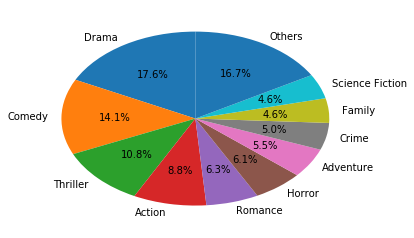

In [734]:
plt.pie(_, labels= _.index, autopct= '%1.1f%%', startangle= 90)
plt.show()

In [735]:
df_p= pd.DataFrame(index = g, columns = range(low, high+1))
df_p.fillna(0.0, inplace=True)
print(df_p.head())

                 1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  \
Action            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Adventure         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Science Fiction   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Thriller          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Fantasy           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                 ...   2006  2007  2008  2009  2010  2011  2012  2013  2014  \
Action           ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Adventure        ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Science Fiction  ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Thriller         ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Fantasy          ...    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                 2015  
Action            0.0  
Ad

In [736]:
pop= np.array(df_mov['popularity'])
k= 0
for i in g_:
    g__= list(map(str,i.split('|')))
    for j in g__:
        df_p.loc[j, yrs[k]]+= pop[k]
    k+=1
print(df_p.head())


                     1960      1961      1962      1963      1964      1965  \
Action           4.725796  2.561389  5.671563  3.806916  4.065433  4.062358   
Adventure        3.504904  4.603938  6.597594  5.099410  3.682157  3.490923   
Science Fiction  0.983714  1.096410  0.358424  0.935671  0.906544  0.203911   
Thriller         4.871460  0.000000  5.324075  7.199292  5.603219  3.773787   
Fantasy          0.856495  0.308146  0.235542  0.428142  2.399162  0.000000   

                     1966      1967      1968      1969     ...      \
Action           3.686859  5.064989  2.193374  5.399760     ...       
Adventure        3.229519  7.178829  5.545733  3.744663     ...       
Science Fiction  1.906741  0.749862  5.374567  0.517620     ...       
Thriller         2.190952  3.509897  2.779596  2.613848     ...       
Fantasy          0.849542  0.561027  2.227921  0.408196     ...       

                      2006       2007       2008        2009        2010  \
Action           60.25

In [737]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
df_p1= df_p.copy()
df_p1[df_p1.columns] = sc.fit_transform(df_p1[df_p1.columns])
print(df_p1.head())

                     1960      1961      1962      1963      1964      1965  \
Action           1.343888  0.348172  1.605126  0.763857  0.718732  1.470893   
Adventure        0.753047  1.338265  1.996432  1.398764  0.550490  1.124313   
Science Fiction -0.467064 -0.361952 -0.640003 -0.646572 -0.667888 -0.869288   
Thriller         1.414381 -0.893419  1.458291  2.430280  1.393755  1.295872   
Fantasy         -0.528631 -0.744050 -0.691929 -0.895883 -0.012691 -0.992961   

                     1966      1967      1968      1969    ...         2006  \
Action           1.246839  1.011440 -0.071646  2.024968    ...     0.878259   
Adventure        0.951448  1.817532  1.534066  1.097634    ...     0.608896   
Science Fiction  0.097082 -0.634089  1.452081 -0.710447    ...    -0.285369   
Thriller         0.280651  0.418422  0.209143  0.464049    ...     1.380434   
Fantasy         -0.585750 -0.706100 -0.055098 -0.771756    ...     0.064256   

                     2007      2008      2009     

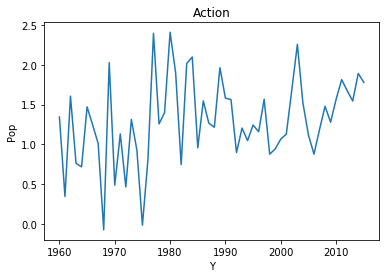

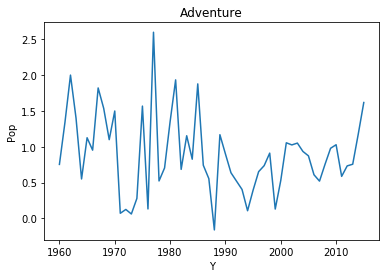

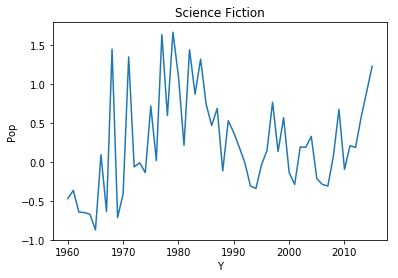

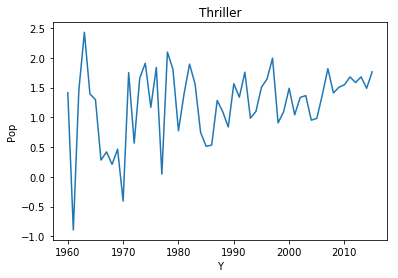

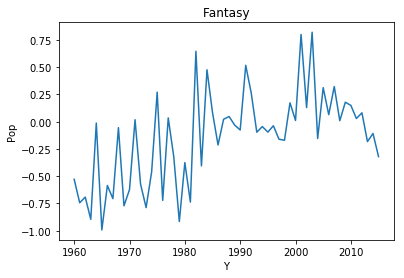

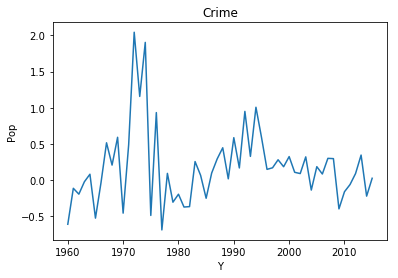

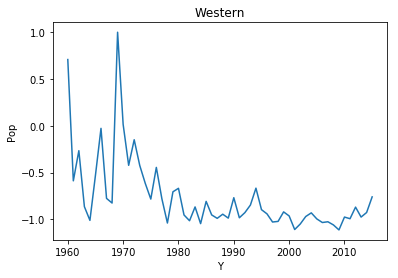

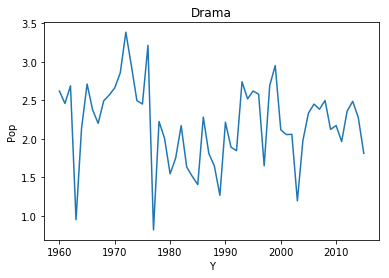

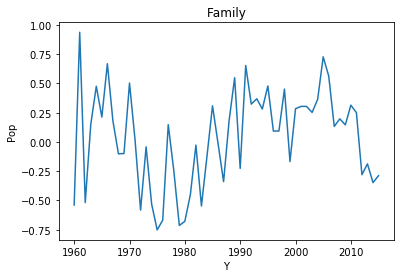

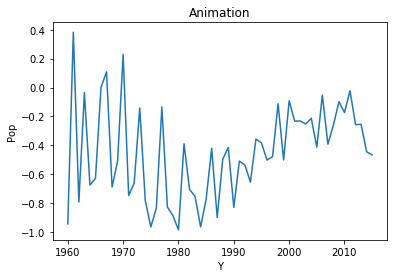

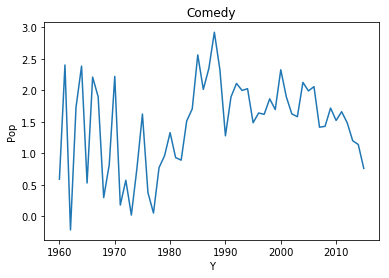

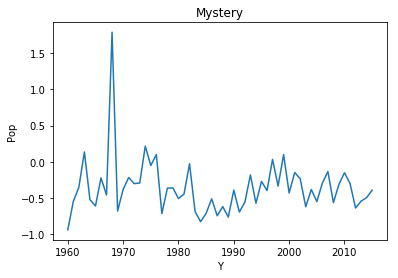

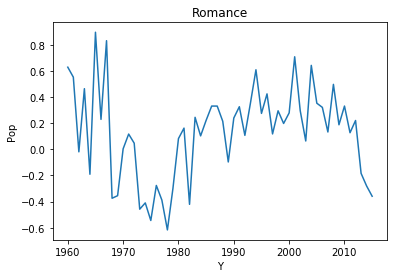

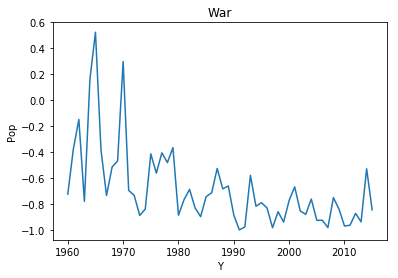

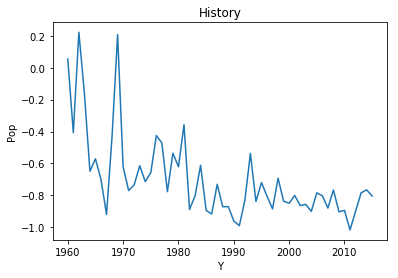

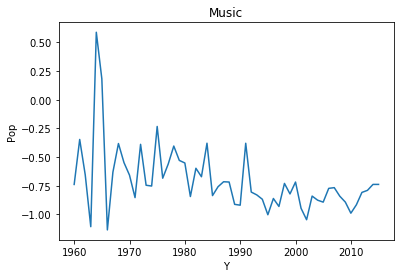

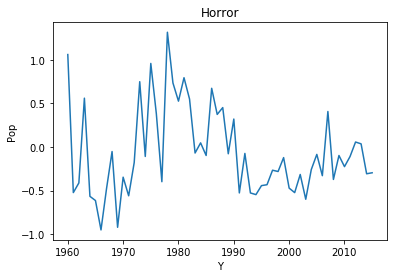

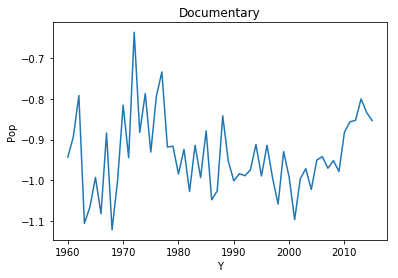

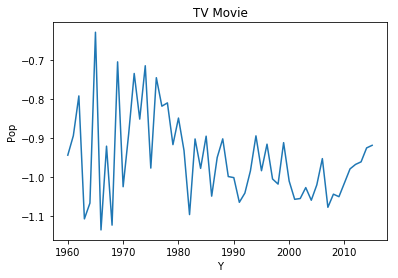

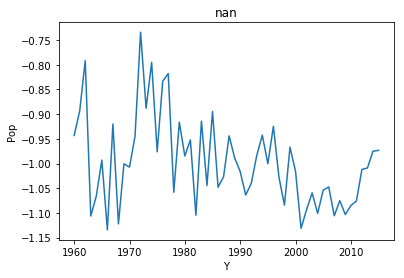

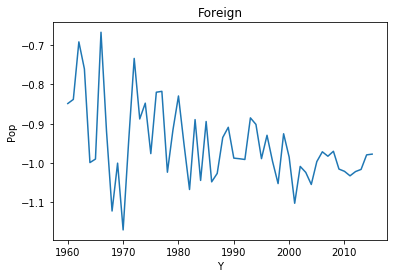

In [738]:
p= df_p1.idxmax(axis=0)
for i in df_p1.index:
    plt.ylabel('Pop')
    plt.xlabel('Y')
    plt.title(i)
    plt.plot(df_p1.loc[i])
    plt.show()

In [739]:
p_11= sc.fit_transform(pop.reshape(-1, 1))
p_= pd.Series(p_11.ravel(), index= df_mov['id'])
print(p_.head())

id
135397    32.334830
76341     27.769638
262500    12.464335
140607    10.525201
168259     8.687366
dtype: float64


In [740]:
b= df_mov['budget']
b.index= df_mov['id']
print(b.head())

id
135397    150000000
76341     150000000
262500    110000000
140607    200000000
168259    190000000
Name: budget, dtype: int64


In [741]:
p_= p_[b!= 0]
b= b[b!=0]

In [742]:
b_= sc.fit_transform(b.reshape(-1, 1))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


     Budget  Popularity
0  3.066070   32.334830
1  3.066070   27.769638
2  2.037710   12.464335
3  4.351519   10.525201
4  4.094429    8.687366


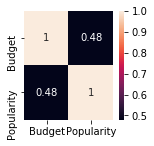

In [743]:
b_= np.array(b_).tolist()
df_111= pd.DataFrame(b_)
df_112= pd.DataFrame(p_)
df_111.reset_index(inplace= True)
df_112.reset_index(inplace= True)
df_111.drop(['index'], inplace= True, axis= 1)
df_112.drop(['id'], inplace= True, axis= 1)
df_111= pd.concat([df_111, df_112], axis= 1)
df_111.columns= ['Budget', 'Popularity']
print(df_111.head())
plt.figure(figsize=(2, 2))
corr = df_111.corr()
sns.heatmap(corr, annot= True)
plt.show()

In [744]:
print(df_mov.columns)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


In [745]:
df_m= pd.read_csv('tmdb_5000_movies.csv')
print(df_m.loc[0])

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                        150.438
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [746]:
import json
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df


def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df
# Columns that existed in the IMDB version of the dataset and are gone.
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

# Columns in TMDb that had direct equivalents in the IMDB version. 
# These columns can be used with old kernels just by changing the names
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_to_original_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['companies_1'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['companies_2'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['companies_3'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [747]:
df_m= load_tmdb_movies("tmdb_5000_movies.csv")
df_c= load_tmdb_credits("tmdb_5000_credits.csv")
df=convert_to_original_format(df_m, df_c)

In [748]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'plot_keywords', 'language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'num_voted_users', 'title_year', 'country', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'companies_1',
       'companies_2', 'companies_3'],
      dtype='object')

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 29 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
plot_keywords           4803 non-null object
language                4717 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
gross                   4803 non-null int64
duration                4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
movie_title             4803 non-null object
vote_average            4803 non-null float64
num_voted_users         4803 non-null 

In [750]:
df.drop(['homepage', 'companies_1', 'companies_2', 'companies_3', 'tagline'], 1, inplace= True)

In [751]:
len(df.dropna())

4570

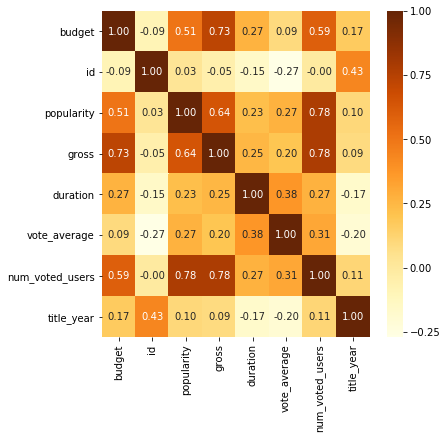

In [752]:
plt.figure(figsize= (6, 6))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = 'YlOrBr')
plt.show()

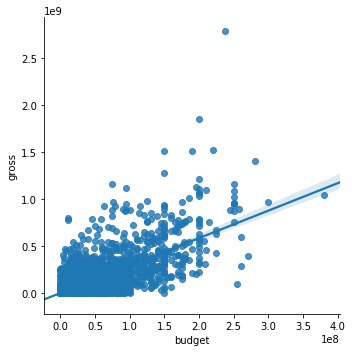

In [753]:
sns.lmplot('budget', 'gross', data= df)
plt.show()

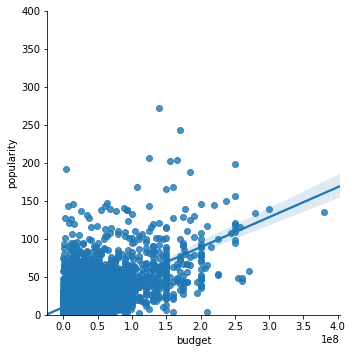

In [754]:
sns.lmplot('budget', 'popularity', data= df)
plt.ylim([0, 400])
plt.show()

In [755]:
df= df[df['popularity']!= 0]

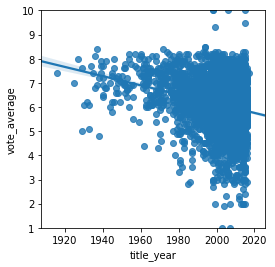

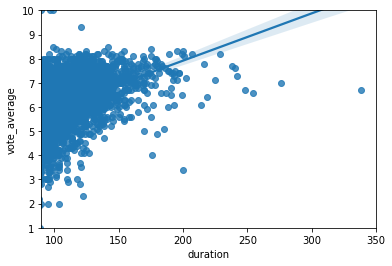

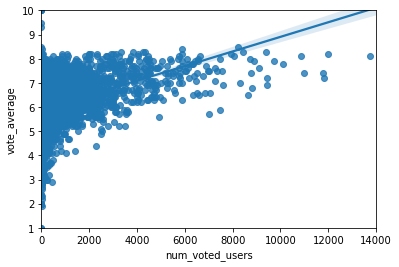

In [756]:
plt.figure(figsize = (4, 4))
plt.ylim([1, 10])
sns.regplot(x="title_year", y="vote_average", data=df)
plt.show()

plt.ylim([1, 10])
plt.xlim([90, 350])
sns.regplot(x='duration', y="vote_average", data=df)
plt.show()

plt.xlim([1, 14000])
plt.ylim([1, 10])
sns.regplot(x='num_voted_users', y="vote_average", data=df)
plt.show()


In [757]:
g= list(map(str,(df['genres'])))
g_= []
for i in g:
    _= list(map(str, i.split('|')))
    for j in _:
        if j not in g_:
            g_.append(j)
# printing list of seperated genres.
print(g_)

['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie', '']


In [758]:
df['Action'] = df['genres'].map(lambda s: 1 if "Action" in s else 0)
df['Adventure'] = df['genres'].map(lambda s: 1 if "Adventure" in s else 0)
df['Science Fiction'] = df['genres'].map(lambda s: 1 if "Science Fiction" in s else 0)
df['Thriller'] = df['genres'].map(lambda s: 1 if "Thriller" in s else 0)
df['Fantasy'] = df['genres'].map(lambda s: 1 if "Fantasy" in s else 0)
df['Crime'] = df['genres'].map(lambda s: 1 if "Crime" in s else 0)
df['Western'] = df['genres'].map(lambda s: 1 if "Western" in s else 0)
df['Drama'] = df['genres'].map(lambda s: 1 if "Drama" in s else 0)
df['Family'] = df['genres'].map(lambda s: 1 if "Family" in s else 0)
df['Animation'] = df['genres'].map(lambda s: 1 if "Animation" in s else 0)
df['Comedy'] = df['genres'].map(lambda s: 1 if "Comedy" in s else 0)
df['Mystery'] = df['genres'].map(lambda s: 1 if "Mystery" in s else 0)
df['Romance'] = df['genres'].map(lambda s: 1 if "Romance" in s else 0)
df['War'] = df['genres'].map(lambda s: 1 if "War" in s else 0)
df['History'] = df['genres'].map(lambda s: 1 if "History" in s else 0)
df['Music'] = df['genres'].map(lambda s: 1 if "Music" in s else 0)
df['Horror'] = df['genres'].map(lambda s: 1 if "Horror" in s else 0)
df['Documentary'] = df['genres'].map(lambda s: 1 if "Documentary" in s else 0)
df['TV Movie'] = df['genres'].map(lambda s: 1 if "TV Movie" in s else 0)
df['Foreign'] = df['genres'].map(lambda s: 1 if "Foreign" in s else 0)


In [759]:
df['plot_keywords'].head()

0    culture clash|future|space war|space colony|so...
1    ocean|drug abuse|exotic island|east india trad...
2    spy|based on novel|secret agent|sequel|mi6|bri...
3    dc comics|crime fighter|terrorist|secret ident...
4    based on novel|mars|medallion|space travel|pri...
Name: plot_keywords, dtype: object

In [760]:
set_keywords = set()
for liste_keywords in df['plot_keywords'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
set_keywords.remove('')

def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    keyword_occurences= []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [761]:
keyword_occurences, dum = count_word(df, 'plot_keywords', set_keywords)
keyword_occurences[:10]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 189],
 ['aftercreditsstinger', 170],
 ['violence', 150],
 ['dystopia', 139],
 ['sport', 126],
 ['revenge', 118]]

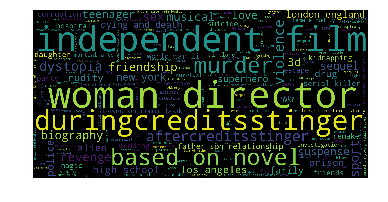

In [762]:
keyword_dict= dict(keyword_occurences)
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600,height=800, background_color='black')
wordcloud.generate_from_frequencies(keyword_dict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

30 30


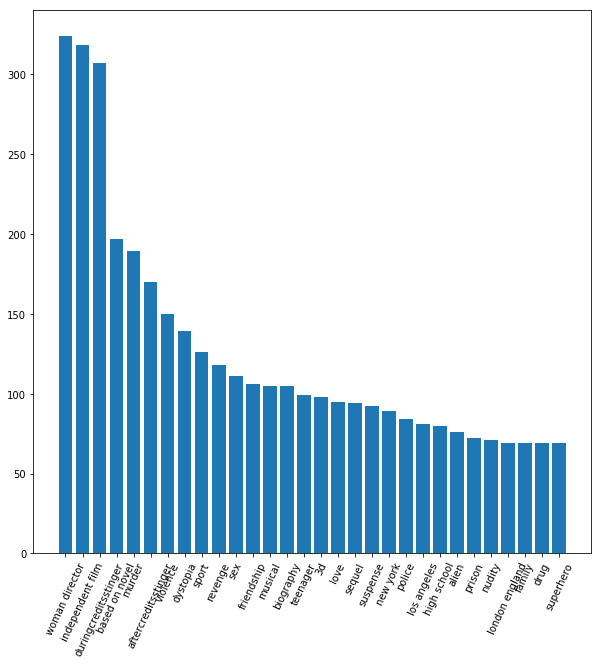

In [763]:
keys= list(keyword_dict.keys())[:30]
values= list(keyword_dict.values())[:30]
print(len(keys), len(values))
plt.figure(figsize= (10, 10))
plt.xticks(np.arange(len(keys)), keys, rotation= 65, fontsize= 10)
plt.bar(range(len(keys)), values)
plt.show()

In [764]:
import nltk
def keywords_inventory(dataframe, colonne = 'plot_keywords'):
    PS= nltk.stem.PorterStemmer()
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys = []
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        for t in s.split('|'):
            t = t.lower() ; racine = PS.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
            else:
                keywords_roots[racine] = {t}
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
    return category_keys, keywords_roots, keywords_select

In [765]:
keywords, keywords_roots, keywords_select = keywords_inventory(df, colonne = 'plot_keywords')

In [766]:
def replacement_df_keywords(df, dico_replacement, roots = False):
    df_new = df.copy(deep = True)
    for index, row in df_new.iterrows():
        chaine = row['plot_keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        PS= nltk.stem.PorterStemmer()
        for s in chaine.split('|'): 
            clef = PS.stem(s) if roots else s
            if clef in dico_replacement.keys():
                nouvelle_liste.append(dico_replacement[clef])
            else:
                nouvelle_liste.append(s)       
        df_new.set_value(index, 'plot_keywords', '|'.join(nouvelle_liste)) 
    return df_new

In [767]:
df_keywords_cleaned = replacement_df_keywords(df, keywords_select, roots = True)

In [768]:
print(df_keywords_cleaned.plot_keywords.head())

0    culture clash|future|space war|space colony|so...
1    ocean|drug abuse|exotic island|east india trad...
2    spy|based on novel|secret agent|sequel|mi6|bri...
3    dc comics|crime fighter|terrorist|secret ident...
4    based on novel|mars|medallion|space travel|pri...
Name: plot_keywords, dtype: object


In [769]:
keyword_occurences, dum = count_word(df_keywords_cleaned, 'plot_keywords', set_keywords)

In [770]:
df['profit']= df['gross']-df['budget']

In [771]:
df['Good_Movie']= df['vote_average'].map(lambda s:1 if s>7 else 0)

16.8471470221


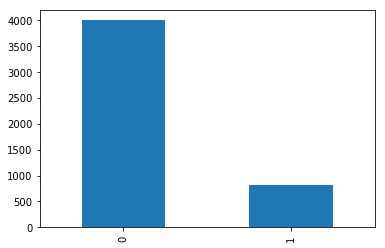

In [772]:
_= df['Good_Movie'].value_counts()
print((_[1]/(_[0]+_[1])*100))
_.plot(kind= 'bar')
plt.show()

In [773]:
df.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'movie_title', 'vote_average',
       'num_voted_users', 'title_year', 'country', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'Action', 'Adventure',
       'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama',
       'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History',
       'Music', 'Horror', 'Documentary', 'TV Movie', 'Foreign', 'profit',
       'Good_Movie'],
      dtype='object')

In [774]:
print(df['country'].value_counts().head(10))

United States of America    3102
United Kingdom               374
Canada                       220
Germany                      200
France                       174
Australia                     87
India                         42
China                         40
Spain                         34
Japan                         34
Name: country, dtype: int64


In [775]:
df['United States of America'] = df['country'].map(lambda s: 1 if s == "United States of America"  else 0)
df['United Kingdom'] = df['country'].map(lambda s: 1 if s == "United Kingdom"  else 0)
df['Canada'] = df['country'].map(lambda s: 1 if s == "Canada"  else 0)
df['Germany'] = df['country'].map(lambda s: 1 if s == "Geramany"  else 0)
df['France'] = df['country'].map(lambda s: 1 if s == "France"  else 0)
df['Australia'] = df['country'].map(lambda s: 1 if s == "Australia"  else 0)
df['India']= df['country'].map(lambda s: 1 if s == "India"  else 0)
df['China']= df['country'].map(lambda s: 1 if s == "China"  else 0)
df['Spain']= df['country'].map(lambda s: 1 if s == "Spain"  else 0)
df['Japan']= df['country'].map(lambda s: 1 if s == "Japan"  else 0)

In [776]:
df['English'] = df['language'].map(lambda s: 1 if s == "English"  else 0)
df['Français'] = df['language'].map(lambda s: 1 if s == "Français" else 0)
df['Español'] = df['language'].map(lambda s: 1 if s == "Español"  else 0)
df['Deutsch'] = df['language'].map(lambda s: 1 if s == "Deutsch" else 0)
df['العربية'] = df['language'].map(lambda s: 1 if s == "العربية" in s else 0)
df['Italiano'] = df['language'].map(lambda s: 1 if s == "Italiano"  else 0)
df['普通话'] = df['language'].map(lambda s: 1 if s == "普通话"  else 0)
df['Pусский'] = df['language'].map(lambda s: 1 if s == "Pусский"  else 0)
df['Český'] = df['language'].map(lambda s: 1 if s == "Český"  else 0)
df['हिन्दी'] = df['language'].map(lambda s: 1 if s == "हिन्दी"  else 0)

In [777]:
#df.drop(['genres', 'id', 'original_title', 'overview', 'production_countries','director_name','actor_1_name','actor_2_name','actor_3_name','language','spoken_languages' ,'status', 'production_companies', 'country'], axis= 1, inplace= True)
df.drop(['genres', 'id', 'original_title', 'overview', 'production_countries','language','spoken_languages' ,'status', 'production_companies', 'country'], axis= 1, inplace= True)

In [778]:
#X= df.drop(['plot_keywords', 'budget', 'gross', 'Good_Movie', 'movie_title', 'release_date'], axis= 1)
#y= df['Good_Movie']
df= df.applymap(lambda x: x.encode('unicode_escape').decode('utf-8') if isinstance(x, str) else x)
print(df[df.isnull().any(axis=1)].count())
df.dropna(inplace= True)
#print(X.shape, y.shape)

budget                      71
plot_keywords               71
popularity                  71
release_date                71
gross                       71
duration                    69
movie_title                 71
vote_average                71
num_voted_users             71
title_year                  71
director_name               42
actor_1_name                29
actor_2_name                19
actor_3_name                 9
Action                      71
Adventure                   71
Science Fiction             71
Thriller                    71
Fantasy                     71
Crime                       71
Western                     71
Drama                       71
Family                      71
Animation                   71
Comedy                      71
Mystery                     71
Romance                     71
War                         71
History                     71
Music                       71
Horror                      71
Documentary                 71
TV Movie

In [779]:
from sklearn.neighbors import NearestNeighbors
import math

def entry_variables(df, id_entry): 
    col_labels = []    
    if pd.notnull(df['director_name'].iloc[id_entry]):
        for s in df['director_name'].iloc[id_entry].split('|'):
            col_labels.append(s)
            
    for i in range(3):
        column = 'actor_NUM_name'.replace('NUM', str(i+1))
        if pd.notnull(df[column].iloc[id_entry]):
            for s in df[column].iloc[id_entry].split('|'):
                col_labels.append(s)
                
    if pd.notnull(df['plot_keywords'].iloc[id_entry]):
        for s in df['plot_keywords'].iloc[id_entry].split('|'):
            col_labels.append(s)
    return col_labels

def add_variables(df, REF_VAR):    
    for s in REF_VAR: df[s] = pd.Series([0 for _ in range(len(df))])
    #colonnes = ['genres', 
    colonnes= ['actor_1_name', 'actor_2_name',
                'actor_3_name', 'director_name', 'plot_keywords']
    for categorie in colonnes:
        for index, row in df.iterrows():
            if pd.isnull(row[categorie]): continue
            for s in row[categorie].split('|'):
                if s in REF_VAR: df.set_value(index, s, 1)            
    return df

def recommand(df, id_entry):    
    df_copy = df.copy(deep = True)    
    '''
    liste_genres = set()
    for s in df['genres'].str.split('|').values:
        liste_genres = liste_genres.union(set(s))    
    '''
    variables = entry_variables(df_copy, id_entry)
    variables += list(liste_genres)
    df_new = add_variables(df_copy, variables)
    df_new = add_variables(df_copy, variables)
    df_new= df_new.replace([np.inf, -np.inf], np.nan)
    df_new.dropna(inplace= True)
    X = df_new.as_matrix(variables)
    nbrs = NearestNeighbors(n_neighbors= 31, algorithm='kd_tree', metric='euclidean').fit(X)

    distances, indices = nbrs.kneighbors(X)    
    xtest = df_new.iloc[id_entry].as_matrix(variables)
    xtest = xtest.reshape(1, -1)

    distances, indices = nbrs.kneighbors(xtest)

    return indices[0][:]
    
def extract_parameters(df, liste_films):     
    parametres_films = ['_' for _ in range(31)]
    i = 0
    max_users = -1
    for index in liste_films:
        parametres_films[i] = list(df.iloc[index][['movie_title', 'title_year',
                                        'imdb_score', 'num_user_for_reviews', 
                                        'num_voted_users']])
        parametres_films[i].append(index)
        max_users = max(max_users, parametres_films[i][4] )
        i += 1
        
    title_main = parametres_films[0][0]
    annee_ref  = parametres_films[0][1]
    parametres_films.sort(key = lambda x:critere_selection(title_main, max_users, annee_ref,
                                                           x[0], x[1], x[2], x[4]), reverse = True)

    return parametres_films 

def sequel(titre_1, titre_2):    
    if fuzz.ratio(titre_1, titre_2) > 50 or fuzz.token_set_ratio(titre_1, titre_2) > 50:
        return True
    else:
        return False

def critere_selection(title_main, max_users, annee_ref, titre, annee, imdb_score, votes):    
    if pd.notnull(annee_ref):
        facteur_1 = gaussian_filter(annee_ref, annee, 20)
    else:
        facteur_1 = 1        

    sigma = max_users * 1.0

    if pd.notnull(votes):
        facteur_2 = gaussian_filter(votes, max_users, sigma)
    else:
        facteur_2 = 0
        
    if sequel(title_main, titre):
        note = 0
    else:
        note = imdb_score**2 * facteur_1 * facteur_2
    
    return note

def add_to_selection(film_selection, parametres_films):    
    film_list = film_selection[:]
    icount = len(film_list)    
    for i in range(31):
        already_in_list = False
        for s in film_selection:
            if s[0] == parametres_films[i][0]: already_in_list = True
            if sequel(parametres_films[i][0], s[0]): already_in_list = True            
        if already_in_list: continue
        icount += 1
        if icount <= 5:
            film_list.append(parametres_films[i])
    return film_list

def remove_sequels(film_selection):    
    removed_from_selection = []
    for i, film_1 in enumerate(film_selection):
        for j, film_2 in enumerate(film_selection):
            if j <= i: continue 
            if sequel(film_1[0], film_2[0]): 
                last_film = film_2[0] if film_1[1] < film_2[1] else film_1[0]
                removed_from_selection.append(last_film)

    film_list = [film for film in film_selection if film[0] not in removed_from_selection]

    return film_list   

def find_similarities(df, id_entry, del_sequels = True, verbose = False):    
    if verbose: 
        print(90*' _ ' + '\n', id_entry, df.iloc[id_entry]['movie_title'])
    liste_films = recommand(df, id_entry)
    parametres_films = extract_parameters(df, liste_films)
    film_selection = []
    film_selection = add_to_selection(film_selection, parametres_films)
    if del_sequels: film_selection = remove_sequels(film_selection)
    film_selection = add_to_selection(film_selection, parametres_films)
    selection_titres = []
    for i,s in enumerate(film_selection):
        selection_titres.append([s[0].replace(u'\xa0', u''), s[5]])
        if verbose: print(i+1,'    ', s[0])
    return selection_titres

dum = find_similarities(df, 3, del_sequels = False, verbose = True)
dum = find_similarities(df, 3, del_sequels = True, verbose = True)

 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 3 The Dark Knight Rises
1      The Dark Knight Rises
2      The Dark Knight
3      Batman Begins
4      Batman Returns
5      Batman & Robin
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 3 The Dark Knight Rises
1      The Dark Knight
2      Batman Returns
3      Teenage Mutant Ninja Turtles
4      Kick-Ass
5      Kick-Ass 2


In [780]:
s= dict()
for i in range(1, 18, 5):
    s[i] = find_similarities(df, i, del_sequels = True, verbose = True)

 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 1 Pirates of the Caribbean: At World's End
1      Pirates of the Caribbean: The Curse of the Black Pearl
2      Nim's Island
3      In the Heart of the Sea
4      Shrek the Third
5      The Life Aquatic with Steve Zissou
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 6 Tangled
1      Tangled
2      Aladdin
3      Pocahontas
4      Enchanted
5      Into the Woods
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 